In [1]:
%matplotlib ipympl
from scipy.stats import expon, norm
import numpy as np
import matplotlib.pyplot as plt
from pynverse import inversefunc
import math

In [2]:
# Конгруэнтный метод (генерирует значение от 0 до 1)
m = 2**32
a = 1664525
c = 1013904223
x_prev = 7


def generator():
    global x_prev
    x_prev = (a*x_prev + c) % m
    
    return x_prev / m
    

$$f(x,y) = f(x)f(y) - условие~независимости$$
$$f(x) = \int_{-\inf}^{\inf}{f(x,y)dy}$$
$$f(y) = \int_{-\inf}^{\inf}{f(x,y)dx}$$
$$f(x,y) = \frac{1}{2}*{\sin(x+y)},      0\le x,y \le \frac{\pi}{2}$$
$$f(x) = \frac{\sqrt2}{2}*{\sin(x+\frac{\pi}{4})}$$
$$f(y) = \frac{\sqrt2}{2}*{\sin(y+\frac{\pi}{4})}$$
$$f(x)f(y) =  \frac{1}{2}*{\sin(x+\frac{\pi}{4})}*{\sin(y+\frac{\pi}{4})} \neq f(x, y) - зависимы$$
$$f(x|y) = \frac{f(x, y)}{f(y)} = \frac{\sqrt2}{2}*\frac{\sin(x+y)}{\sin(y+\frac{\pi}{4})}$$
$$f(y|x) = \frac{f(x, y)}{f(x)} = \frac{\sqrt2}{2}*\frac{\sin(x+y)}{\sin(x+\frac{\pi}{4})}$$
$$F(x,y) = \frac{1}{2}*(\sin(x)+\sin(y)-\sin(x+y))$$

$$F(x) = \int_{-\inf}^{x}{f(t)dt} = -\frac{\sqrt2}{2}*(cos(x+\frac{\pi}{4}))+\frac{1}{2}$$
$$F(y|x) = \int_{-\inf}^{y}{f(t|x)dt} = \frac{\sqrt2}{2*{sin(x+\frac{\pi}{4})}}*(cos(x) - cos(x+y))$$

$$M(x) = \int_{-\inf}^{\inf}{x*f(x)dx} = \frac{\pi}{4}$$
$$M(y) = \int_{-\inf}^{\inf}{y*f(y)dy} = \frac{\pi}{4}$$
$$M(x,y) = \int_{-\inf}^{\inf}{\int_{-\inf}^{\inf}} xy*f(x,y)dxdy =\frac{1}{2}\int_{-\inf}^{\inf}{\int_{-\inf}^{\inf}} xy*{\sin(x+y)}dxdy = -1 + \frac{\pi}{2}$$
$$D(x) = \int_{-\inf}^{\inf}{x^2*f(x)dx} - M^2(x)= 0.1876$$
$$D(y) = \int_{-\inf}^{\inf}{y^2*f(y)dy} - M^2(y)= 0.1876$$
$$cov_{xy} = M(x,y) - M(x)M(y) = (-1)+\frac{\pi}{2} + \frac{\pi}{4}*\frac{\pi}{4} = -0.460$$
$$r_{xy} = \frac{cov_{xy}}{\sqrt{D(x)*D(y)}} = -0.245$$


In [36]:
# Task 1. Variant(2)
from sympy import integrate, Symbol, sin, simplify
from scipy import integrate as int
from sympy.abc import x

N = 10**5
x1 = Symbol('x1')
y1 = Symbol('y1')
t = Symbol('t')
f_x_symbols = (1/2) * sin(x1 + y1)

# Одномерные плотности распределения
f_x1 = integrate(f_x_symbols, (y1, 0, math.pi/2))
print(f"f(x): {simplify(f_x1)}")
f_y1 = integrate(f_x_symbols, (x1, 0, math.pi/2))
print(f"f(y): {simplify(f_y1)}")

print(f"f(x)*f(y): {simplify(f_x1*f_y1)}")

# Условные плотности распределения
print(f"f(x|y): {simplify(f_x_symbols/f_y1)}")
print(f"f(y|x): {simplify(f_x_symbols/f_x1)}")

# Безусловные математические ожидания
M_x = integrate(f_x1*x1, (x1, 0, math.pi/2))
M_y = integrate(f_y1*y1, (y1, 0, math.pi/2))
print(f"М(x): {M_x}")
print(f"М(y): {M_y}")

# Безусловная дисперсия
D_x = integrate(f_x1*x1**2, (x1, 0, math.pi/2)) - M_x**2
D_y = integrate(f_y1*y1**2, (y1, 0, math.pi/2)) - M_y**2
print(f"D(x): {D_x}")
print(f"D(y): {D_y}")

# Математическое ожидание двумерной СВ
M_x_y = integrate(f_x_symbols*x1*y1, (y1, 0, math.pi/2), (x1,0, math.pi/2))
print(f"M(x,y): {M_x_y}")
print(f"cov_xy: {M_x_y-M_x*M_y}")
print(f"r_xy: {(M_x_y-M_x*M_y)/(math.sqrt(D_x*D_y))}")

f_x = lambda x, y: (1/2) * math.sin(x + y)
F_x_y = integrate(f_x_symbols, (y1, 0, y1), (x1, 0, x1))
print(f"F_x_y: {F_x_y}")

F_x = integrate(f_x1.replace(x1, t), (t, 0, x1))
print(f"F_x: {simplify(F_x)}")
print(simplify(integrate(0.5*(sin(t + y1)), (y1, 0, math.pi/2), (t, 0, x1))))

f_t_x = simplify(f_x_symbols/f_x1).replace(y1, t)
F_y_x = integrate(f_t_x, (t, 0, y1))
print(f"F_y_x: {F_y_x}")
print(simplify(integrate(0.5*(sin(t + x1)), (x1, 0, math.pi/2), (t, 0, y1))))

f(x): 0.5*sqrt(2)*sin(x1 + pi/4)
f(y): 0.5*sqrt(2)*sin(y1 + pi/4)
f(x)*f(y): 0.5*sin(x1 + pi/4)*sin(y1 + pi/4)
f(x|y): 0.5*sqrt(2)*sin(x1 + y1)/sin(y1 + pi/4)
f(y|x): 0.5*sqrt(2)*sin(x1 + y1)/sin(x1 + pi/4)
М(x): 0.785398163397448
М(y): 0.785398163397448
D(x): 0.187646601862981
D(y): 0.187646601862981
M(x,y): 0.570796326794896
cov_xy: -0.0460539482731885
r_xy: -0.245429162137542
F_x_y: 0.5*sin(x1) + 0.5*sin(y1) - 0.5*sin(x1 + y1)
F_x: -0.5*sqrt(2)*cos(x1 + pi/4) + 0.5
-0.5*sqrt(2)*cos(x1 + pi/4) + 0.5
F_y_x: 0.5*sqrt(2)*cos(x1)/sin(x1 + pi/4) - 0.5*sqrt(2)*cos(x1 + y1)/sin(x1 + pi/4)
-0.5*sqrt(2)*cos(y1 + pi/4) + 0.5


In [37]:
def f_x_pdf(x):
    return 0.5 * math.sqrt(2) * math.sin(x + math.pi/4)

def f_x_y_pdf(x, y):
    return 0.5 * np.sin(x + y)

def F_x_cdf(x):
    return -0.5*math.sqrt(2)*math.cos(x + math.pi/4) + 0.5

def F_y_if_x_cdf(y, x):
    return (0.5*math.sqrt(2)/math.sin(x + math.pi/4))*(math.cos(x) - math.cos(x + y))

func_F_x = lambda x: -0.5*np.sqrt(2)*np.cos(x + np.pi/4) + 0.5
inv_F_x_cdf = inversefunc(func_F_x, accuracy=0, domain=[0, np.pi / 2])

def inv_F_y_if_x_cdf(y, x):
    inv_f = inversefunc(lambda y: (0.5*np.sqrt(2)/np.sin(x + np.pi/4))*(np.cos(x) - np.cos(x + y)),  accuracy=0, domain=[0, np.pi / 2]) 
    return inv_f(y)

In [38]:
import random
N=10**4

x = [random.random() for i in range(N)]
y = [random.random() for i in range(N)]
     
list_of_points_x = np.array([inv_F_x_cdf(i) for i in x ])
list_of_points_y = np.array([inv_F_y_if_x_cdf(i, x_i) for i, x_i in zip(y, list_of_points_x)])

list_x_y_points = np.stack([list_of_points_x, list_of_points_y])


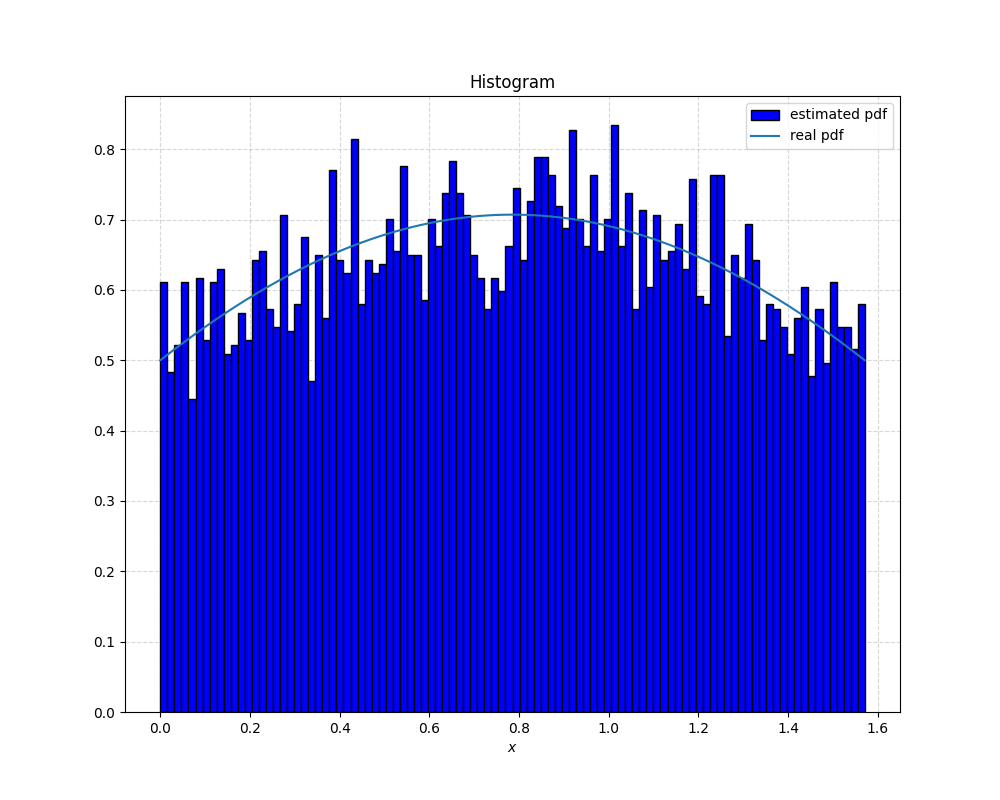

In [40]:
import matplotlib.pyplot as plt
import numpy as np


def create_histogram(list_of_points, bins, pdf_numbers=None):
        
     plt.figure(figsize=(10, 8))
     plt.hist(list_of_points, bins=bins, color='b', density=True, edgecolor='k', 
         label='estimated pdf', zorder=2)
    
     if pdf_numbers is not None:
         plt.plot(pdf_numbers[0], pdf_numbers[1], label="real pdf")

     plt.xlabel(r'$x$')
     plt.legend()
     plt.grid(which='both', linestyle='--', alpha=0.5)
     plt.title("Histogram")
     plt.show()


x_pdf_numbers = np.array([f_x_pdf(x) for x in np.linspace(0, math.pi/2, N)])
create_histogram(list_x_y_points[0], 100, (np.linspace(0, math.pi/2, N), x_pdf_numbers) )

C:\Users\Татьяна\AppData\Local\Temp\ipykernel_7176\787316267.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


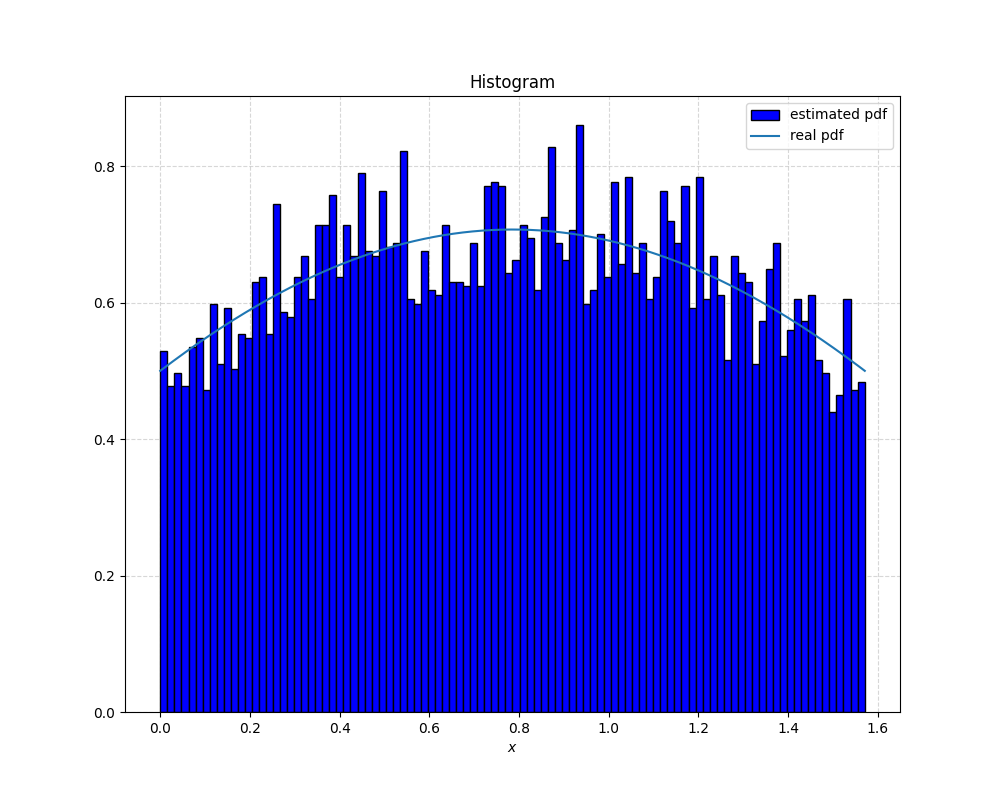

In [41]:
y_pdf_numbers = np.array([f_x_pdf(x) for x in np.linspace(0, math.pi/2, N)])
create_histogram(list_x_y_points[1], 100, (np.linspace(0, math.pi/2, N), y_pdf_numbers) )

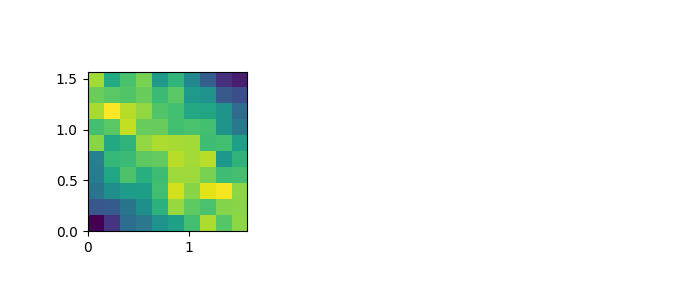

In [42]:
x_edges = np.linspace(0, math.pi/2, 15)
y_edges = np.linspace(0, math.pi/2, 15)

H, xedges, yedges = np.histogram2d(list_x_y_points[0], list_x_y_points[1], bins=(10, 10))
H = H.T

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131)
plt.imshow(H, interpolation='nearest', origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])

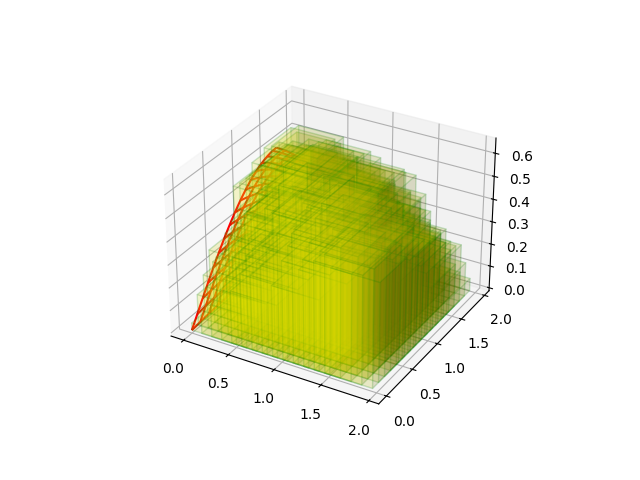

In [43]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(list_x_y_points[0], list_x_y_points[1], bins=(x_edges, y_edges), density=True)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', alpha=0.1, edgecolor='green', color='yellow')

X = np.arange(0, np.pi/2, 0.01)
Y = np.arange(0, np.pi/2, 0.01)
xgrid, ygrid = np.meshgrid(x, y)
X, Y = np.meshgrid(X, Y)
Z = f_x_y_pdf(X, Y)

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color="red")

plt.show()

In [44]:
from scipy import stats
from scipy.stats import shapiro
import statistics

#https://www.statmodel.com/download/FAQ-Bootstrap%20-%20Pvalue.pdf
def bootstrap_evaluation(data, sample_size, sample_number, func, theoretical_value, func2=None):
    if func2 is None:
        func2=func
    func_res = []
   
    if len(data.shape) != 1:
         main_res = func(data[0], data[1])
    else:
         main_res = func(data)
        
    for i in range(sample_number):
        if len(data.shape) == 1:
            current_data = np.random.choice(data, sample_number)
        else:
            idxs = np.array([idx for idx in range(len(data[0]))])
            current_idxs = np.random.choice(idxs, sample_size)
            current_data = data[:, current_idxs]
        
        if len(data.shape) != 1:
            func_res.append(func(current_data[0], current_data[1]))
        else: 
            func_res.append(func(current_data))

    func_res = np.array(func_res)
    
    se = np.sqrt(((func_res - func2(func_res)) ** 2).sum() / (sample_number - 1))
    
    low_res = main_res - 1.96 * se
    upper_res = main_res + 1.96 * se

    p_value = 2 * norm.cdf(-abs(main_res - theoretical_value) / se)

    print(f"p_value: {p_value}")


def check_generated_values(points, theoretical_value_mu, theoretical_value_s, alpha=0.05):
    N = len(points)
    mu = points.mean()
    sigma = np.sqrt(((points - mu) ** 2).sum() / (N - 1))
    
    t_gamma = stats.t.ppf(1-alpha/2, N-1)
    
    low_mu = mu - sigma / np.sqrt(N) * t_gamma
    upper_mu = mu + sigma / np.sqrt(N) * t_gamma
    
    
    chi_stat = (N - 1) * sigma**2
    c1 = stats.chi2.ppf(alpha / 2, N - 1)
    c2 = stats.chi2.ppf(1 - alpha / 2, N - 1)

    low_sigma = chi_stat / c2
    upper_sigma = chi_stat / c1
   
    print("Точечная оценка матожидания: ", mu)
    print(f"{1-alpha}% интервальная оценка матожидания: [{low_mu}, {upper_mu}]")
    bootstrap_evaluation(points, 1000, 1000, np.mean, theoretical_value_mu)
    
    print("Точечная оценка дисперсии: ", sigma**2)
    print(f"{1-alpha}% интервальная оценка дисперсии: [{low_sigma}, {upper_sigma}]")
    bootstrap_evaluation(points, 1000, 1000, np.var, theoretical_value_s)   
    
    print(shapiro(points))
    

def check_сorrelation(points_x, points_y, theoretical_value_r, alpha=0.05):
    xy_mean = (points_x * points_y).sum() / N
    x_mean = points_x.mean()
    y_mean = points_y.mean()
    sigma_x = np.sqrt(((points_x - x_mean) ** 2).sum() / (N - 1))
    sigma_y = np.sqrt(((points_y - y_mean) ** 2).sum() / (N - 1))
    r_xy = (xy_mean - x_mean*y_mean) / (sigma_x*sigma_y)
    
    print("Точечная оценка корреляции: ", r_xy)
    print("Eсть линейная взаимосвязь между переменными. Зависимость слабая (0.1 < |r_xy| < 0.3)")

    m_r = np.sqrt(1 - r_xy ** 2)/(np.sqrt(N-2))
    t_gamma = stats.t.ppf(1-alpha/2, N-2)
    print(f"{1-alpha}% интервальная оценка корреляции: [{r_xy-m_r*t_gamma}, {r_xy+m_r*t_gamma}]")
    
    X = np.stack((points_x, points_y), axis=0)
    bootstrap_evaluation(X, 1000, 1000,  statistics.correlation, theoretical_value_r, np.mean)


print("оценка для x")
check_generated_values(list_x_y_points[0], 0.78539, 0.18764, alpha=0.05)
print()
print("оценка для y")
check_generated_values(list_x_y_points[1], 0.78539, 0.18764, alpha=0.05)
print()
check_сorrelation(list_x_y_points[0], list_x_y_points[1], -0.245429, alpha=0.05)


оценка для x
Точечная оценка матожидания:  0.7887673704985996
0.95% интервальная оценка матожидания: [0.7802354500496356, 0.7972992909475636]
p_value: 0.7952630467689761
Точечная оценка дисперсии:  0.18944897734966615
0.95% интервальная оценка дисперсии: [0.18430530690767366, 0.19481206170078863]
p_value: 0.9924627522614538
ShapiroResult(statistic=0.9642525315284729, pvalue=4.764414778704378e-44)

оценка для y
Точечная оценка матожидания:  0.7854697637729652
0.95% интервальная оценка матожидания: [0.7770050458591108, 0.7939344816868196]
p_value: 0.9953040545523777
Точечная оценка дисперсии:  0.18647630282833455
0.95% интервальная оценка дисперсии: [0.1814133425505401, 0.19175523415615037]


D:\University\Course 7\ММОД\Lab3\Lab3\env\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p_value: 0.9949253920518244
ShapiroResult(statistic=0.9642626047134399, pvalue=4.764414778704378e-44)

Точечная оценка корреляции:  -0.23352850298181113
Eсть линейная взаимосвязь между переменными. Зависимость слабая (0.1 < |r_xy| < 0.3)
0.95% интервальная оценка корреляции: [-0.25259042563824885, -0.21446658032537344]
p_value: 0.6827870882109275


In [45]:
# Task 2 (29 Распределение Паскаля)
import numpy as np
import math
import random
from scipy.stats import nbinom

delta = 0.001
r = 40
p = 0.6
N=10**6

matrix_x_y = [[0.01, 0.01, 0.02, 0.02, 0.01],
              [0.04, 0.3, 0.06, 0.03, 0.01],
              [0.02, 0.03, 0.06, 0.07, 0.05],
              [0.05, 0.03, 0.04, 0.02, 0.03],
              [0.03, 0.02, 0.01, 0.01, 0.02]]


def generate_range(p_arr):
    list_with_ranges = [0]
    i = 0
    
    while list_with_ranges[i] < 1:
        list_with_ranges.append( round(p_arr[i] + list_with_ranges[-1], 6))
        i += 1
        
    list_with_ranges.append(1)    
    list_with_ranges = list_with_ranges[1:len(list_with_ranges)-1]

    return list_with_ranges


def calculate_C_n_k(n, k):
    return (math.factorial(n)/math.factorial(k))/math.factorial(n-k)


def f_x(i):
    return calculate_C_n_k(i+r-1,i)*(p**r)*(1-p)**i
    

def generate_descreete_value(list_with_ranges):
    num = generator()
    i = 0
    while num > list_with_ranges[i]:
        i += 1
        
    return i
    
x = [ 0.15, 0.54 ,0.73, 0.88, 1.00]
y = [ 0.07, 0.51, 0.74, 0.91, 1.00]

p_x = [round(np.sum([row[i] for row in matrix_x_y]), 6) for i in range(0,len(matrix_x_y[0]))]
p_y = np.sum(matrix_x_y, axis=1)

#Безусловные законы распределения
print("P_x: ", p_x)
print("P_y: ", p_y)

x_range = generate_range(p_x)
y_range = generate_range(p_y)
print("X range: ", x_range)
print("Y range ", y_range)

x_points = [ generate_descreete_value(x_range) for i in range(N)]
y_points = [ generate_descreete_value(y_range) for i in range(N)]

print(len(x_points), len(y_points))

P_x:  [0.15, 0.39, 0.19, 0.15, 0.12]
P_y:  [0.07 0.44 0.23 0.17 0.09]
X range:  [0.15, 0.54, 0.73, 0.88, 1.0]
Y range  [0.07, 0.51, 0.74, 0.91, 1.0]
1000000 1000000


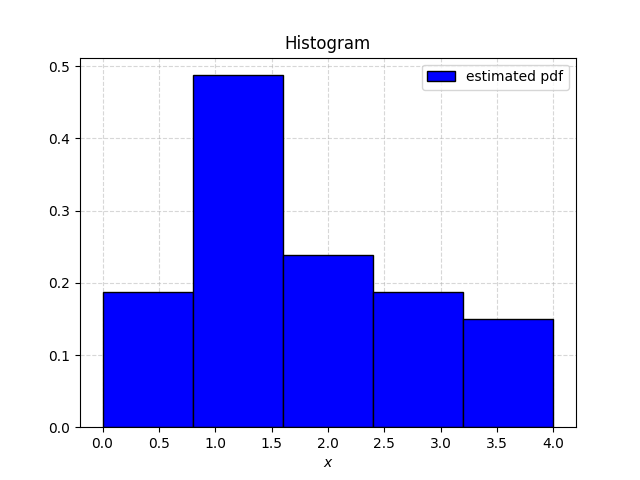

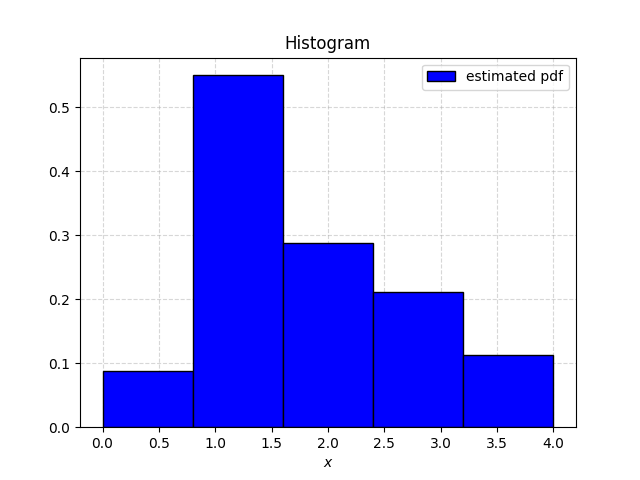

In [46]:
import matplotlib.pyplot as plt
import numpy as np


def create_histogram2(list_of_points):
    fig, ax = plt.subplots(1, 1)

    plt.hist(list_of_points, bins=5, color='b', density=True, edgecolor='k', 
         label='estimated pdf', zorder=2)
    
    plt.xlabel(r'$x$')
    plt.legend()
    plt.grid(which='both', linestyle='--', alpha=0.5)
    plt.title("Histogram")
    plt.show()


create_histogram2(x_points)
create_histogram2(y_points)

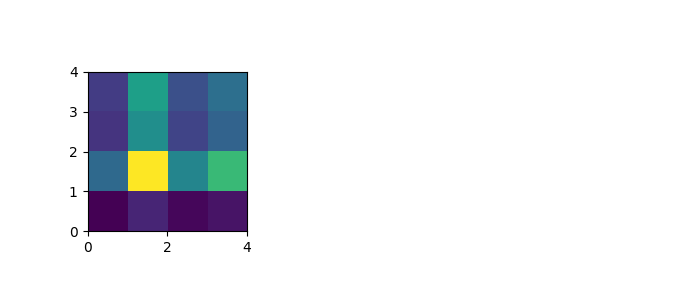

In [47]:
x_edges = np.linspace(0, len(x_range) - 1, 15)
y_edges = np.linspace(0, len(y_range) - 1, 15)

H, xedges, yedges = np.histogram2d(x_points, y_points, bins=(len(x_range) - 1, len(x_range) - 1))
H = H.T

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131)
plt.imshow(H, interpolation='nearest', origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])

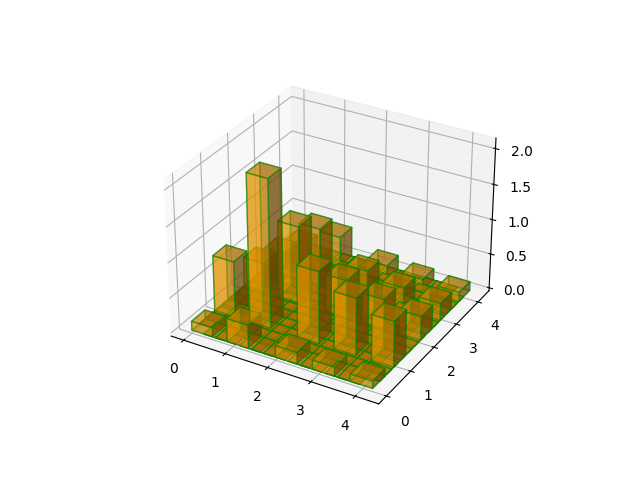

In [49]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x_points, y_points, bins=(x_edges, y_edges), density=True)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', alpha=0.5, edgecolor='green', color='orange')
plt.show()

In [50]:
is_dependent = False

for i in range(len(p_x)):
    for j in range(len(p_y)):
        print(matrix_x_y[j][i], round(p_x[i],6) * round(p_y[j],6))
        if matrix_x_y[j][i] != round(p_x[i],6)*round(p_y[j],6):
            is_dependent = True
            break
    if is_dependent:
        break;

if is_dependent:
    print("Dependent")

0.01 0.0105
Dependent


In [51]:
print("X|Y")
for i in range(len(matrix_x_y)):
    for j in range(len(matrix_x_y)):
        print(f"P({x[i]}|{y[j]}) = {round(matrix_x_y[j][i]/p_x[i],4)}", end="; ")

print()
print("Y|X")

for i in range(len(matrix_x_y)):
    for j in range(len(matrix_x_y)):
        print(f"P({x[i]}|{y[j]}) = {round(matrix_x_y[j][i]/p_y[i],4)}", end="; ")

X|Y
P(0.15|0.07) = 0.0667; P(0.15|0.51) = 0.2667; P(0.15|0.74) = 0.1333; P(0.15|0.91) = 0.3333; P(0.15|1.0) = 0.2; P(0.54|0.07) = 0.0256; P(0.54|0.51) = 0.7692; P(0.54|0.74) = 0.0769; P(0.54|0.91) = 0.0769; P(0.54|1.0) = 0.0513; P(0.73|0.07) = 0.1053; P(0.73|0.51) = 0.3158; P(0.73|0.74) = 0.3158; P(0.73|0.91) = 0.2105; P(0.73|1.0) = 0.0526; P(0.88|0.07) = 0.1333; P(0.88|0.51) = 0.2; P(0.88|0.74) = 0.4667; P(0.88|0.91) = 0.1333; P(0.88|1.0) = 0.0667; P(1.0|0.07) = 0.0833; P(1.0|0.51) = 0.0833; P(1.0|0.74) = 0.4167; P(1.0|0.91) = 0.25; P(1.0|1.0) = 0.1667; 
Y|X
P(0.15|0.07) = 0.1429; P(0.15|0.51) = 0.5714; P(0.15|0.74) = 0.2857; P(0.15|0.91) = 0.7143; P(0.15|1.0) = 0.4286; P(0.54|0.07) = 0.0227; P(0.54|0.51) = 0.6818; P(0.54|0.74) = 0.0682; P(0.54|0.91) = 0.0682; P(0.54|1.0) = 0.0455; P(0.73|0.07) = 0.087; P(0.73|0.51) = 0.2609; P(0.73|0.74) = 0.2609; P(0.73|0.91) = 0.1739; P(0.73|1.0) = 0.0435; P(0.88|0.07) = 0.1176; P(0.88|0.51) = 0.1765; P(0.88|0.74) = 0.4118; P(0.88|0.91) = 0.1176; P

$$M_{x} = \sum(x_{i}*p_{i}) $$
$$M_{x^2} = \sum(x_{i}^2*p_{i}) $$
$$D_{x} = M_{x^2} - M_{x}^2 $$
$$\sigma_{x} = \sqrt{D_{x}} $$
$$cov(X,Y) = M_{xy} - M_{x}*M_{y} $$
$$r_{xy} = \frac{cov(X,Y)}{\sigma_{x}*\sigma_{y}} $$

In [52]:
def get_theoretical_characteristics(x, y, p_x,p_y,matrix_x_y):
    M_x_y = 0
    M_x = (x*p_x).sum()
    M_y = (y*p_y).sum()
    D_x = (x**2*p_x).sum() - M_x**2
    sigma_x = math.sqrt(D_x)
    D_y = (y**2*p_y).sum() - M_y**2
    sigma_y = math.sqrt(D_y)

    print("Точечная оценка матожидания X: ", M_x)
    print("Точечная оценка дисперсии X: ", D_x)
    print("Среднеквадратическое отклонение X: ", sigma_x)
    print("Точечная оценка матожидания Y: ", M_y)
    print("Точечная оценка дисперсии Y: ", D_y)
    print("Среднеквадратическое отклонение Y: ", sigma_y)
    
    for i in range(len(x)):
        for j in range(len(y)):
            M_x_y += matrix_x_y[j][i]*x[i]*y[j]
            
    cov_xy = round(M_x_y - M_x*M_y, 4)
    r_xy = round(cov_xy/(sigma_x*sigma_y), 4)
    
    print(f"Математическое ожидание(х,у): {round(M_x_y,6)}")
    print(f"Коэффициент ковариации cov(x,y): {cov_xy}")
    print(f"Коэффициент корреляции: {r_xy}")

    return M_x, D_x, M_y, D_y, r_xy


x_points_range = [x_range[i] for i in x_points]
y_points_range = [y_range[i] for i in y_points]

M_x, D_x, M_y, D_y, r_xy = get_theoretical_characteristics(np.array(x),np.array(y),np.array(p_x),np.array(p_y),matrix_x_y)

Точечная оценка матожидания X:  0.6238
Точечная оценка дисперсии X:  0.06538355999999995
Среднеквадратическое отклонение X:  0.2557020922870987
Точечная оценка матожидания Y:  0.6442
Точечная оценка дисперсии Y:  0.05651835999999999
Среднеквадратическое отклонение Y:  0.2377359038933749
Математическое ожидание(х,у): 0.402078
Коэффициент ковариации cov(x,y): 0.0002
Коэффициент корреляции: 0.0033


In [53]:
print("оценка для x")
check_generated_values(np.array(x_points_range), M_x, D_x, alpha=0.05)
print()
print("оценка для y")
check_generated_values(np.array(y_points_range), M_y, D_y, alpha=0.05)
print()
check_сorrelation(np.array(x_points_range), np.array(y_points_range), r_xy, alpha=0.05)


оценка для x
Точечная оценка матожидания:  0.6240903500000001
0.95% интервальная оценка матожидания: [0.6235897398983721, 0.6245909601016282]
p_value: 0.9714416887696914
Точечная оценка дисперсии:  0.0652382021750797
0.95% интервальная оценка дисперсии: [0.0650577513044994, 0.06541940832582084]
p_value: 0.9982234644123743
ShapiroResult(statistic=0.8738787174224854, pvalue=0.0)

оценка для y
Точечная оценка матожидания:  0.6443959500000003
0.95% интервальная оценка матожидания: [0.6439301896875502, 0.6448617103124503]
p_value: 0.9794463800905291
Точечная оценка дисперсии:  0.0564712921948897
0.95% интервальная оценка дисперсии: [0.056315090866532816, 0.056628147306539665]
p_value: 0.9993364280067003
ShapiroResult(statistic=0.8593248128890991, pvalue=0.0)

Точечная оценка корреляции:  -0.0019757455702079387
Eсть линейная взаимосвязь между переменными. Зависимость слабая (0.1 < |r_xy| < 0.3)
0.95% интервальная оценка корреляции: [-0.003935710061555045, -1.578107886083223e-05]
p_value: 0.8